# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

*<font color = blue>在將資料轉換為幾種標準格式的資料清理步驟之後，下一步是查看資料並看看我們正在查看的內容是否有意義。 在應用任何奇特的演算法之前，先探索數據總是很重要的。</font>*

*<font color = blue>在處理數值資料時，我們可以使用一些探索性資料分析 (EDA) 技術，包括查找資料集的平均值、資料的分佈、最常見的值等。處理文字時的想法是相同的資料。 在使用機器學習 (ML) 技術識別隱藏模式之前，我們將使用 EDA 找到一些更明顯的模式。 我們將看看每位喜劇演員的以下內容：</font>*

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## 最常用的單字 Most Common Words

### Analysis

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,dave,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0
aaah,0,0,0,1,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,3,0,0
abc,1,0,0,0,0,0,0,0,0,0
abcs,0,0,1,0,0,0,0,0,0,0


In [2]:
# Find the top 30 words said by each comedian
# 尋找每位喜劇演員說過的最熱門的 30 個單詞
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('like', 127),
  ('im', 74),
  ('know', 68),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('gotta', 21),
  ('oh', 21),
  ('wanna', 21),
  ('time', 20),
  ('husband', 20),
  ('right', 19),
  ('got', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('hes', 14),
  ('god', 14),
  ('need', 14),
  ('yeah', 13),
  ('tell', 13),
  ('work', 12),
  ('theyre', 12)],
 'anthony': [('im', 60),
  ('like', 51),
  ('know', 39),
  ('dont', 38),
  ('joke', 37),
  ('got', 34),
  ('thats', 31),
  ('said', 31),
  ('just', 30),
  ('anthony', 27),
  ('day', 26),
  ('say', 26),
  ('guys', 23),
  ('people', 23),
  ('tell', 19),
  ('youre', 19),
  ('right', 18),
  ('time', 18),
  ('think', 18),
  ('grandma', 18),
  ('thing', 17),
  ('jokes', 17),
  ('yeah', 17),
  ('okay', 16),
  ('did', 16),
  ('school', 16),
  ('good', 16),
  ('family', 15),
  ('baby', 15),
  ('gonna', 15)]

In [3]:
# Print the top 15 words said by each comedian
# 印出每位喜劇演員說過的前 15 個單詞
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, gotta, oh, wanna
---
anthony
im, like, know, dont, joke, got, thats, said, just, anthony, day, say, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking
---
jim
like, im, dont, right, fucking, just, know, went, youre, people, thats, oh, day, think
---
joe
like, people, just, dont, im, fcking, fck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, thats, right, youre, time, little, hey, got
---
louis
like, just, know, dont, thats, im, youre, life, people, thing, gonna, hes, cause, theres
---
mike
like, im, know, said, just, dont, think, thats, says, cause, jenny, right, goes, id
---
ricky
right, like, just, im, dont, know, said, yeah, fucking, got, say, youre, went, thats
---


**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [4]:
# Look at the most common top words --> add them to the stop word list
# 查看最常見的熱門單字 --> 將它們添加到停用詞列表中 -->words list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
len(words)

300

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
# 讓我們匯總這個列表並確定最常見的單字以及它們出現的例程數量
Counter(words).most_common()

[('like', 10),
 ('im', 10),
 ('know', 10),
 ('just', 10),
 ('dont', 10),
 ('thats', 10),
 ('right', 10),
 ('people', 10),
 ('youre', 9),
 ('got', 9),
 ('gonna', 8),
 ('time', 7),
 ('think', 7),
 ('cause', 6),
 ('hes', 6),
 ('yeah', 6),
 ('theyre', 6),
 ('said', 6),
 ('shit', 5),
 ('oh', 5),
 ('day', 5),
 ('say', 5),
 ('thing', 5),
 ('going', 5),
 ('theres', 5),
 ('really', 5),
 ('good', 4),
 ('fucking', 4),
 ('fuck', 4),
 ('didnt', 4),
 ('did', 3),
 ('want', 3),
 ('little', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('guy', 2),
 ('come', 2),
 ('man', 2),
 ('goes', 2),
 ('ive', 2),
 ('kids', 2),
 ('real', 2),
 ('life', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('god', 1),
 ('need', 1),
 ('work', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('school', 1),
 ('family', 1),
 ('baby', 1),
 ('dude', 1),
 ('make', 1),
 ('let', 1),
 ('ahah', 1),
 ('

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
# 如果超過一半的喜劇演員將其作為最常用詞，請將其從清單中排除
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'time',
 'think']

In [7]:
# Let's update our document-term matrix with the new list of stop words
# 讓我們用新的停用詞列表更新我們的文檔術語矩陣
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Recreate document-term matrix
cv = CountVectorizer(stop_words=add_stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [8]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

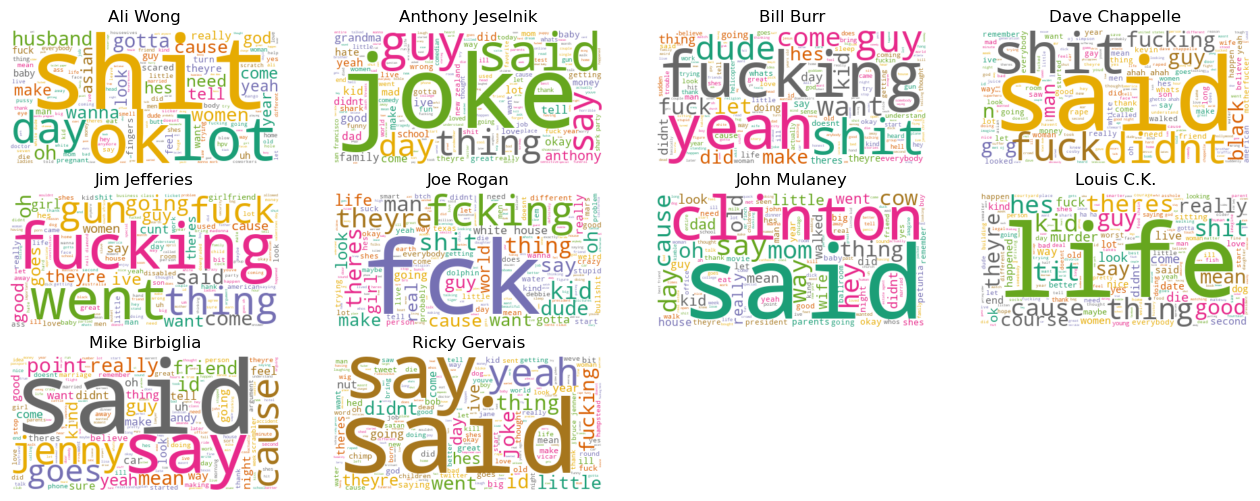

In [9]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Dave Chappelle', 'Jim Jefferies',
              'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## 字數 Number of Words

### Analysis

In [10]:
# Find the number of unique words that each comedian uses
# 找出每個喜劇演員使用的獨特單字的數量

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
# 辨識文件術語矩陣中的非零項，表示該單字至少出現一次
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,1039
7,Louis C.K.,1133
4,Jim Jefferies,1360
0,Ali Wong,1377
3,Dave Chappelle,1430
6,John Mulaney,1444
5,Joe Rogan,1484
8,Mike Birbiglia,1535
9,Ricky Gervais,1672
2,Bill Burr,1683


In [11]:
# Calculate the words per minute of each comedian
# 計算每位喜劇演員每分鐘的字數

# Find the total number of words that a comedian uses
# 尋找喜劇演員使用的總單字數
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 67, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,1039,3013,59,51.067797
0,Ali Wong,1377,3345,60,55.750000
7,Louis C.K.,1133,3404,58,58.689655
3,Dave Chappelle,1430,4132,67,61.671642
4,Jim Jefferies,1360,4831,77,62.740260
8,Mike Birbiglia,1535,4812,76,63.315789
9,Ricky Gervais,1672,5040,79,63.797468
6,John Mulaney,1444,4086,62,65.903226
2,Bill Burr,1683,5613,80,70.162500
5,Joe Rogan,1484,4646,63,73.746032


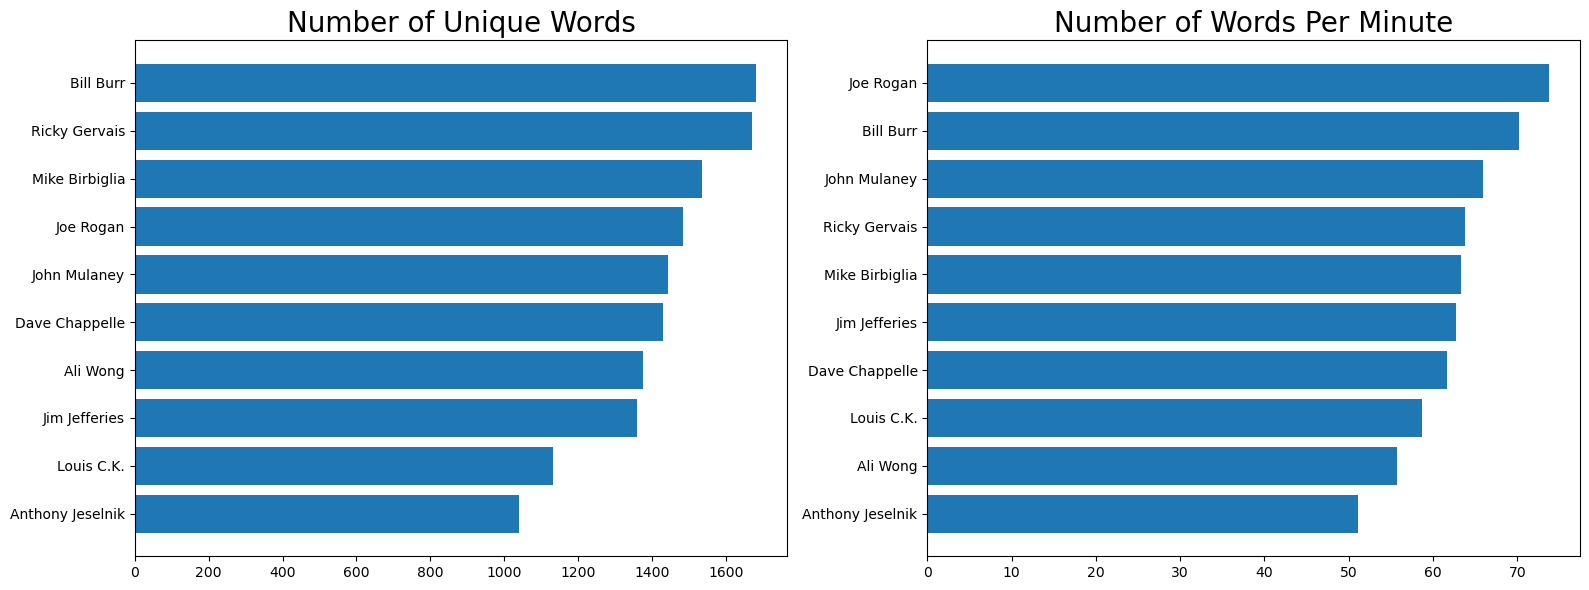

In [12]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

## 髒話的數量 Amount of Profanity

### Analysis

In [13]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
# 早些時候我說過我們會重新討論髒話。 讓我們再看一下最常見的單字。
Counter(words).most_common()

[('like', 10),
 ('im', 10),
 ('know', 10),
 ('just', 10),
 ('dont', 10),
 ('thats', 10),
 ('right', 10),
 ('people', 10),
 ('youre', 9),
 ('got', 9),
 ('gonna', 8),
 ('time', 7),
 ('think', 7),
 ('cause', 6),
 ('hes', 6),
 ('yeah', 6),
 ('theyre', 6),
 ('said', 6),
 ('shit', 5),
 ('oh', 5),
 ('day', 5),
 ('say', 5),
 ('thing', 5),
 ('going', 5),
 ('theres', 5),
 ('really', 5),
 ('good', 4),
 ('fucking', 4),
 ('fuck', 4),
 ('didnt', 4),
 ('did', 3),
 ('want', 3),
 ('little', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('guy', 2),
 ('come', 2),
 ('man', 2),
 ('goes', 2),
 ('ive', 2),
 ('kids', 2),
 ('real', 2),
 ('life', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('god', 1),
 ('need', 1),
 ('work', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('school', 1),
 ('family', 1),
 ('baby', 1),
 ('dude', 1),
 ('make', 1),
 ('let', 1),
 ('ahah', 1),
 ('

In [14]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,107,64
dave,65,46
jim,115,20
joe,0,40
john,4,6
louis,21,25
mike,0,0
ricky,60,6


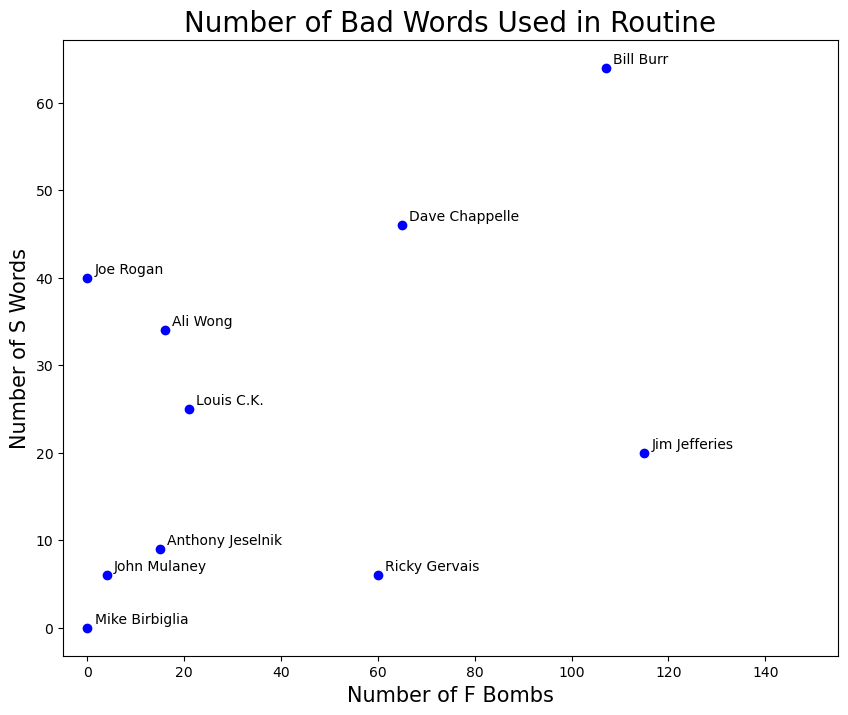

In [15]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

*<font color = blue>我們旅程中 EDA 部分的目標是什麼？ 能夠初步查看我們的數據，看看一些基本分析的結果是否有意義。</font>*

*<font color = blue>我的結論是——是的，對於第一次通過來說確實如此。 肯定有一些事情可以更好地清理，例如添加更多停用詞或包含二元語法。 但我們可以留到以後再說。 結果，尤其是髒話的發現，很有趣且具有普遍意義，因此我們將繼續前進。</font>*

*<font color = blue>提醒一下，資料科學過程是一個互動式過程。 最好是看到一些不完美但可以接受的結果，以幫助您快速確定您的專案是否是一個無用的項目，而不是分析癱瘓並且永遠不會交付任何東西。</font>*

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.